## EXPLORATORY DATA ANALYSIS (EDA)

### IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. UNDERSTANDING THE DATASET: **TITANIC DATASET**

In [ ]:
def load_and_describe(file_name):
    try:
        df=pd.read_csv(file_name)
        
        '''DATA DESCRIPTION'''
        
        print('\n Dataset Head:')
        print(df.head())
        print('\n Basic Information:')
        print(df.info())
        print('\n Summary Statistics:')
        print(df.describe())
        print('\n Skewness:')
        print(df.skew(numeric_only=True))
        print('\n Kurtosis:')
        print(df.kurt(numeric_only=True))

        return df
        
    except Exception as e:
        print(f'error loading the data:{e}')
        return none 

## 2. DATA CLEANING AND PREPROCESSING

In [10]:
def clean_data(df):
    '''HANDLING MISSING VALUES,DUPLICATE VALUES AND OUTLIERS IN THE DATASET'''

    '''1.CHECKING FOR DUPLICATES AND DUPLICATE VALUE TREATMENT'''

    #duplicate values detection
    print(f'Duplicate Values:{df.duplicated().sum()}')

    #duplicate values treatment by droping 
    df=df.drop_duplicates()

    print(f'Duplicates removed .Remaining rows :{len(df)} ')


    '''2.CHECKING FOR MISSING VALUES AND MISSING VALUE TREATMENT'''

    #missing values detection in percentage
    print(f'Missing Value percentage:')
    print(round(df.isnull().sum()/len(df) *100,2))

    #missing values treatment
    df=df.fillna(value={'age':df['age'].mean(),
                        'deck':'unknown',
                        'embarked':df['embarked'].mode()[0],
                        'embark_town':df['embark_town'].mode()[0]})

    print(f'row count after missing value imputation:\n {round(df.isnull().sum()/len(df) *100,2)} ')


    '''OUTLIER DETECTION AND TREATMENT'''

    #outlier detection
    print('Outlier Analysis')
    numeric_data=df.select_dtypes(include=np.number)

    for col in numeric_data.columns:
        Q1=df[col].quantile(0.25)
        Q2=df[col].quantile(0.5)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        LW=Q1-(1.5*IQR)
        UW=Q3+(1.5*IQR)
        outliers=((df[col] < LW) | (df[col] > UW))

        if outliers.sum() > 0:
            print(f'{col} has  {outliers.sum()/len(df)*100:.2f}% outliers ')
        else:
            print(f'{col} des not have any outliers ')

    #outlier treatment
    df.loc[(df[col] < LW) | (df[col] > UW),col]=Q2

    return df


Duplicate Values:107
Duplicates removed .Remaining rows :784 
Missing Value percentage:
survived        0.00
pclass          0.00
sex             0.00
age            13.52
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.26
class           0.00
who             0.00
adult_male      0.00
deck           74.23
embark_town     0.26
alive           0.00
alone           0.00
dtype: float64
row count after missing value imputation:
 survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64 
survived des not have any outliers 
pclass des not have any outliers 
age has  4.97% outliers 
sibsp has  4.97% outliers 
parch has  1.91% outliers 
fare has  13.01% outliers 


## 3. IDENTIFYING TRENDS

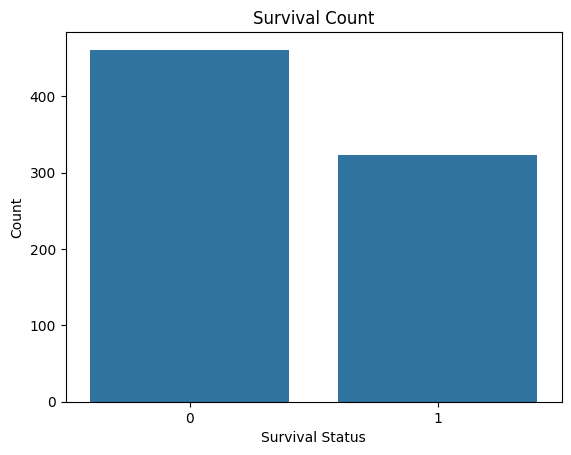

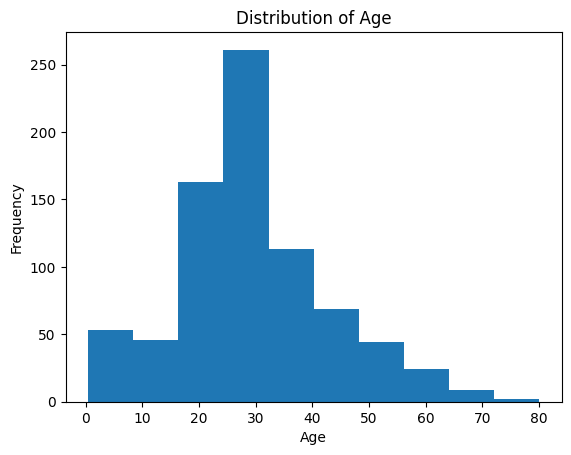

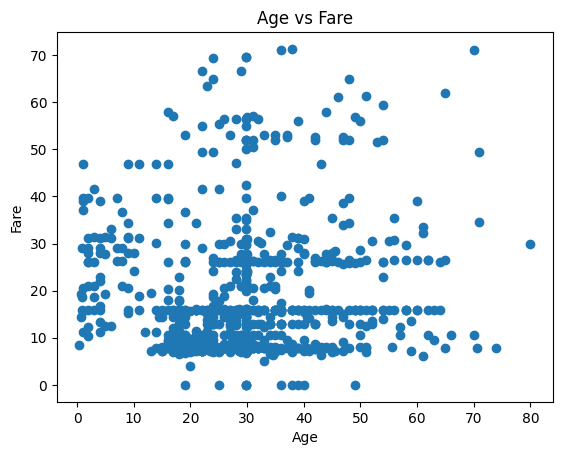

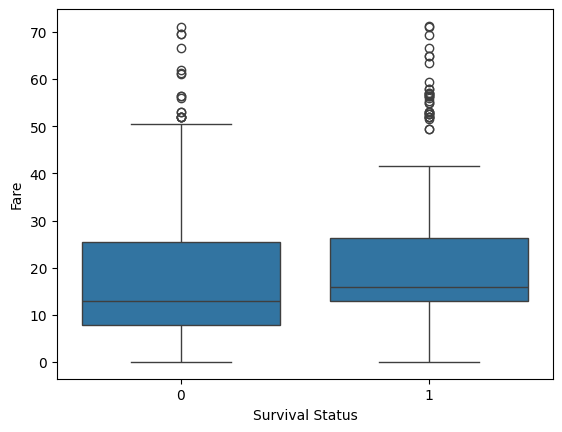

<Figure size 1000x600 with 0 Axes>

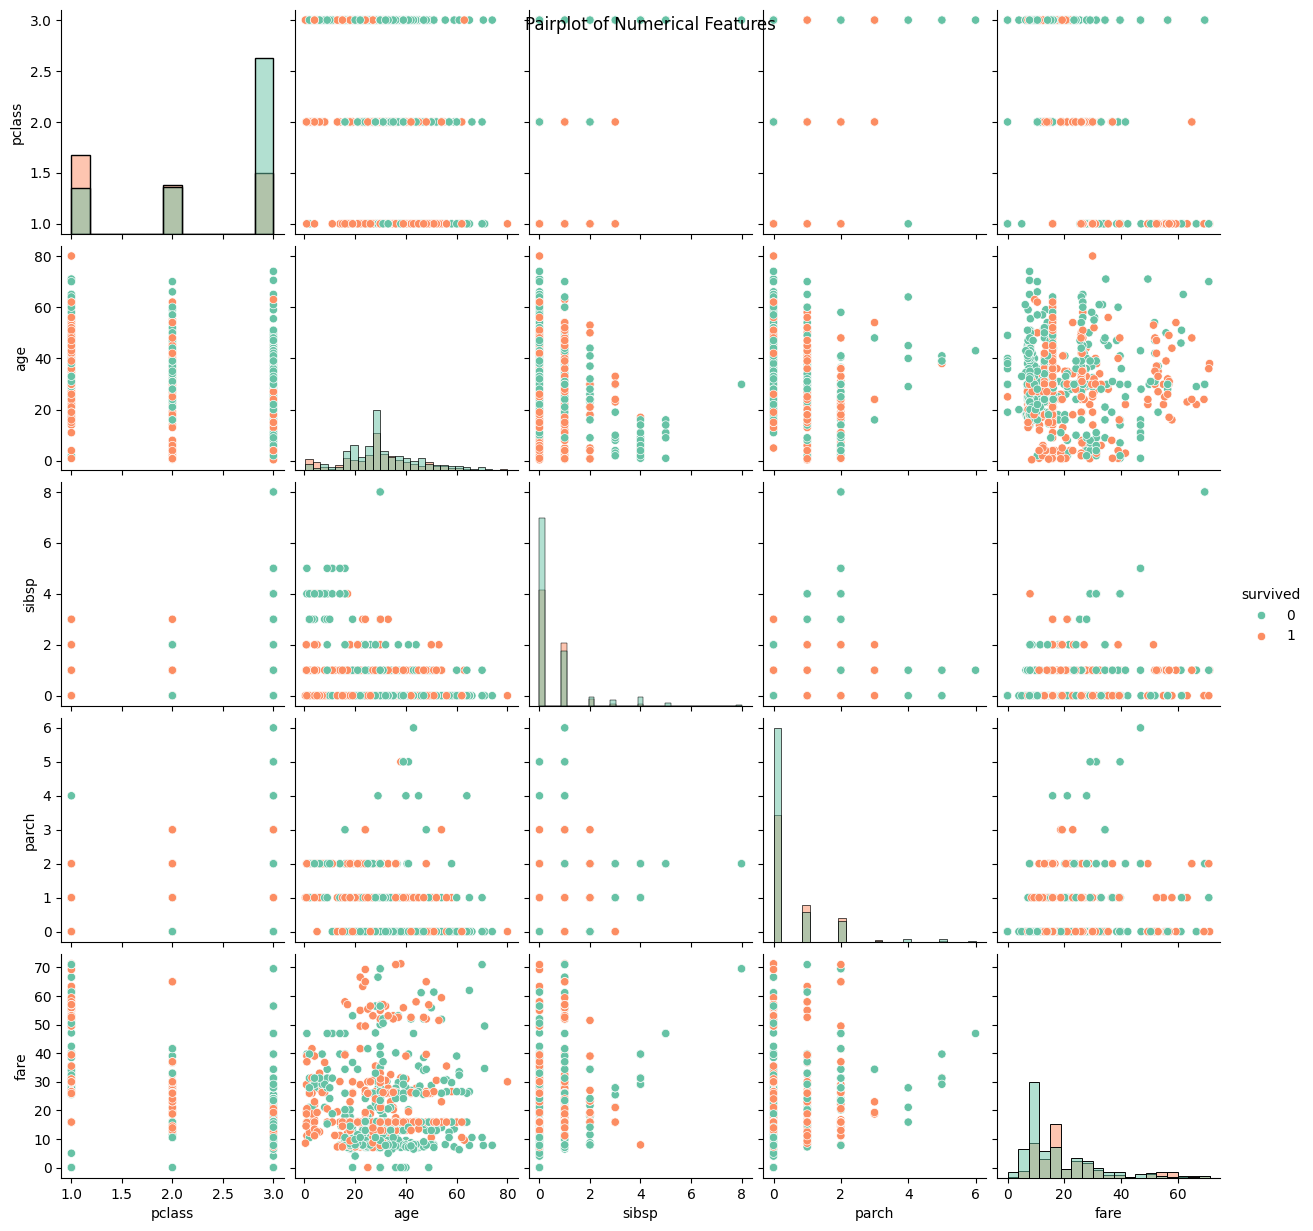

In [13]:
def identify_trends(data):
    
    '''IDENTIFYING TRENDS IN DATA THROUGH VISUALS'''

    # 1.BAR PLOT
    sns.countplot(x='survived', data=data)
    plt.xlabel("Survival Status")
    plt.ylabel("Count")
    plt.title("Survival Count")
    plt.show()
        
    # 2.HISTOGRAM
    plt.hist(data["age"], bins=10)
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.title("Distribution of Age")
    plt.show()

    # 3.SCATTER PLOT
    plt.scatter(data["age"], data["fare"])
    plt.xlabel("Age")
    plt.ylabel("Fare")
    plt.title("Age vs Fare")
    plt.show()
    
    # 4.BOX PLOT
    sns.boxplot(x=data["survived"], y=data["fare"])
    plt.xlabel("Survival Status")
    plt.ylabel("Fare")
    plt.show()
    
    # 5.PAIR PLOT CHART
    numeric_data = data.select_dtypes(include=np.number)
    if len(numeric_data.columns) >= 2:
        plt.figure(figsize=(10, 6))
        sns.pairplot(numeric_data,hue='survived',palette='Set2',diag_kind='hist')
        plt.suptitle("Pairplot of Numerical Features")
        plt.show()



## 4 GENERATING INSIGHTS FROM DATA:

### General Observations:
1. The orange points (Survived = 1) represent passengers who survived.
2. The green points (Survived = 0) represent passengers who did not survive.

### Survival vs Passenger Class:
1. Survival has a strong correlation with passenger class.
2. Passengers in 1st class (Pclass = 1) had a much higher survival rate, as seen by the concentration of orange points.
3. Passengers in 3rd class (Pclass = 3) had a much lower survival rate, as seen by the concentration of green points.

### Survival vs Age:
1. Younger passengers appear more likely to survive.
2. There is a noticeable concentration of orange points for younger age.
3. Elder passengers had mixed survival rates, but survival rates declined among very elderly passengers.

### SibSp (siblings/spouses) and parch (parents/children):
1. Survival tends to decrease with an increase in Sibsp or parch value.
2. passengers travelling alone are or with one family member (ie sibsp or parch to or 1) they are more likely to survive.
3. Larger family groups (higher Sibsp of parch) Show fewer Survivors (more green points)

### Survival vs Fare:
1. survival passengers who paid higher fares are more likely to survive.
2. A clear distinction shows that many Survivors Lorange Points) paid significantly higher fares.
3. lower fares are mostly associated with non-survivors  (green points) 

### Age and Fare Interaction:
1. young passengers who paid higher fares have higher Survival rates.
2. There's a clustering of non- survivers (green points) among older passengers who paid lower feres.

## Summary of key Insights:
1. class and wealth (Pclass and fare) play a significant role in Survival.
2. Family size matters: Smaller families of individual passengers who were travelling alone had better chances Survival.
3. Age:younger passengers survived at higher rates.
4. Fare:Higher fare generally indicatehigher survival rate.

In [46]:
def generate_insights():
    return '''
    

## 4 GENERATING INSIGHTS FROM DATA:

### General Observations:
1. The orange points (Survived = 1) represent passengers who survived.
2. The green points (Survived = 0) represent passengers who did not survive.

### Survival vs Passenger Class:
1. Survival has a strong correlation with passenger class.
2. Passengers in 1st class (Pclass = 1) had a much higher survival rate, as seen by the concentration of orange points.
3. Passengers in 3rd class (Pclass = 3) had a much lower survival rate, as seen by the concentration of green points.

### Survival vs Age:
1. Younger passengers appear more likely to survive.
2. There is a noticeable concentration of orange points for younger age.
3. Elder passengers had mixed survival rates, but survival rates declined among very elderly passengers.

### SibSp (siblings/spouses) and parch (parents/children):
1. Survival tends to decrease with an increase in Sibsp or parch value.
2. passengers travelling alone are or with one family member (ie sibsp or parch to or 1) they are more likely to survive.
3. Larger family groups (higher Sibsp of parch) Show fewer Survivors (more green points)

### Survival vs Fare:
1. survival passengers who paid higher fares are more likely to survive.
2. A clear distinction shows that many Survivors Lorange Points) paid significantly higher fares.
3. lower fares are mostly associated with non-survivors  (green points) 

### Age and Fare Interaction:
1. young passengers who paid higher fares have higher Survival rates.
2. There's a clustering of non- survivers (green points) among older passengers who paid lower feres.

## Summary of key Insights:
1. class and wealth (Pclass and fare) play a significant role in Survival.
2. Family size matters: Smaller families of individual passengers who were travelling alone had better chances Survival.
3. Age:younger passengers survived at higher rates.
4. Fare:Higher fare generally indicatehigher survival rate.
    
    
    '''

## 5. VISUALIZING RESULTS

In [47]:
def visualize_results(data):
    '''GENERATE VISUALIZATION FOR DATASET FOR IN-DEPTH ANALYSIS'''

    #correlation analysis
    correlations=round(data.corr(numeric_only=True)*100,2)
    sns.heatmap(correlations,annot=True,cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Pclass vs Survival Rate
    sns.barplot(x = 'pclass', y = 'survived', data = data, errorbar = None)
    plt.title('Survival Rate by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Survival Rate')
    plt.show()
    
    # Survival Rate by Fare (Distribution)
    sns.histplot(data=data, x='fare', hue='survived', bins = 30, kde = True)
    plt.title("Fare distribution by Survival")
    plt.xlabel("Fare")
    plt.ylabel("Frequency")
    plt.show()
    
    # Family Size analysis
    data['FamilySize'] = data['sibsp'] + data['parch'] + 1
    sns.barplot(x = 'FamilySize', y = 'survived', data = data, errorbar=None)
    plt.title('Survival Rate by Family Size')
    plt.xlabel('Family Size')
    plt.ylabel('Survival Rate')
    plt.show()

    #Survival Rate by Gender
    sns.barplot(data=data,x='sex',y='survived',hue='pclass',errorbar=None)
    plt.xlabel('Gender')
    plt.ylabel('Survival Rate')
    plt.show()

    #Survival Rate Embarked Town
    sns.barplot(data=data,x='embarked',y='survived',hue='class',errorbar=None)
    plt.title('Survival Rate by Embarked Town and Passenger Class')
    plt.xlabel('Embarked')
    plt.ylabel('Survival Rate')
    plt.show()


## 6. SUMMARIZING THE FINDINGS

In [53]:
def eda_function():
    
    file_name='titanic.csv'

    print('='*10,'Understanding the Dataset','='*10,'\n')

    df=load_and_describe(file_name)
    if df is None:
        print(f' failed to load the {file_name} file')

    print('\n','='*10,'Data Cleaning and Preprocessing','='*10,'\n')
    cleaned_data=clean_data(df)

    print('\n','='*10,'Identifying Trends','='*10,'\n')
    identify_trends(cleaned_data)

    print('\n','='*10,'Generating Insights','='*10,'\n')
    print(generate_insights())

    print('\n','='*10,'Visualizing Results','='*10,'\n')
    print(visualize_results(cleaned_data))
   

========== Understanding the Dataset ========== 


 Dataset Head:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null 

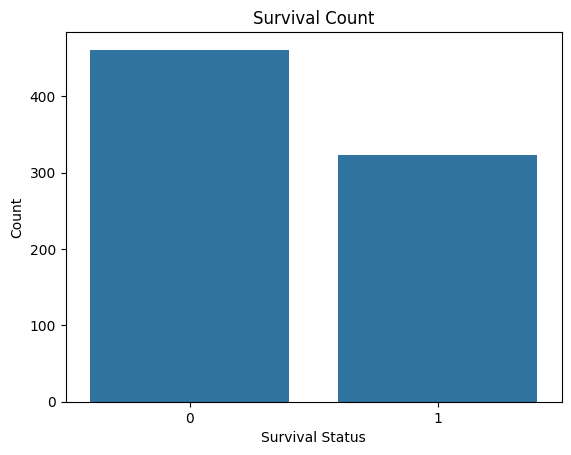

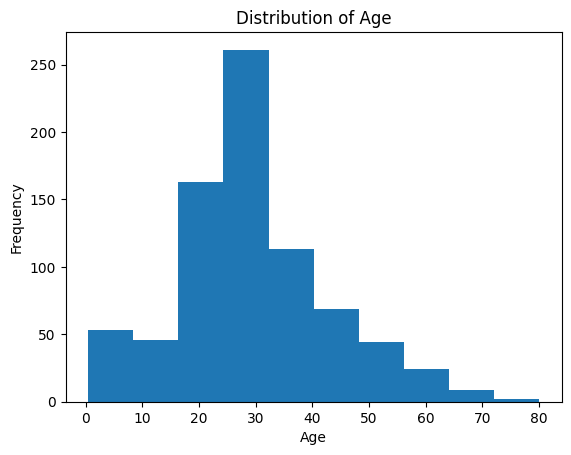

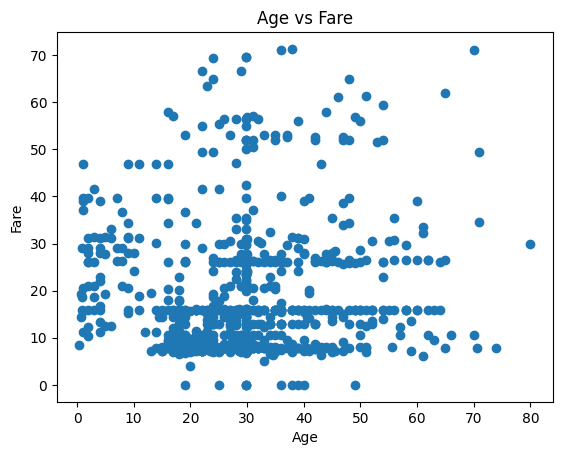

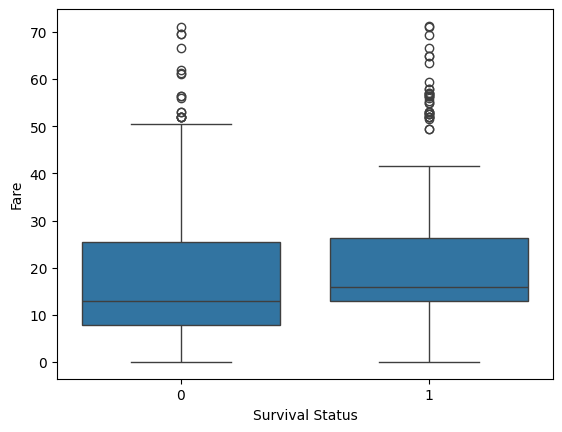

<Figure size 1000x600 with 0 Axes>

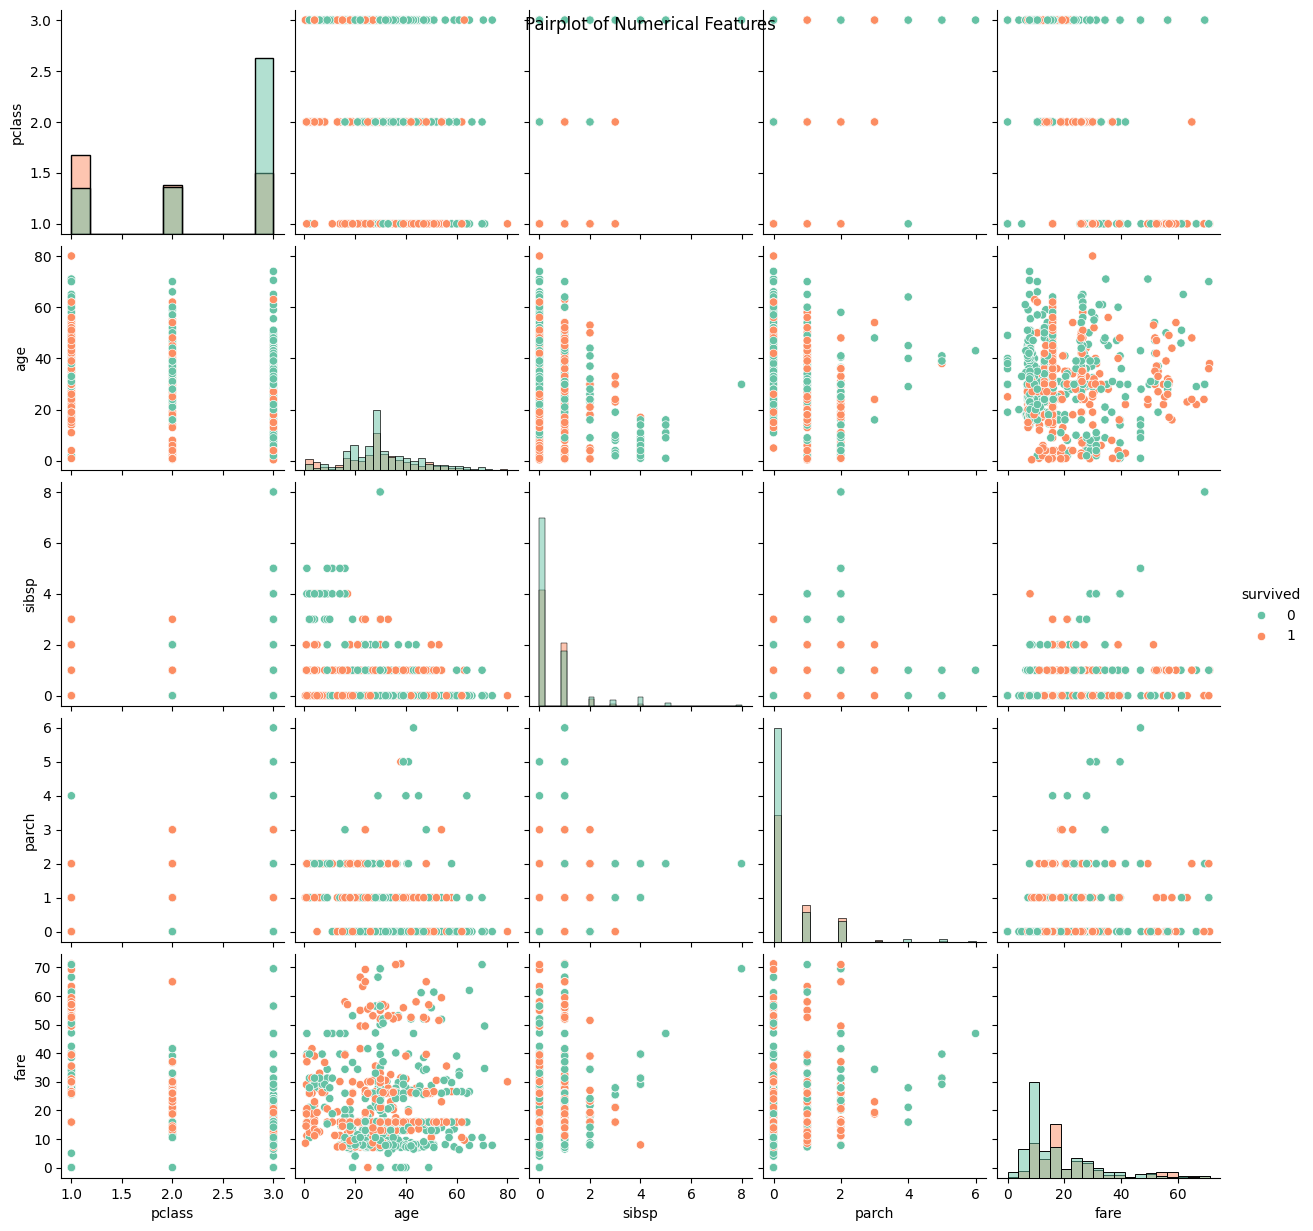


 ========== Generating Insights ========== 




## 4 GENERATING INSIGHTS FROM DATA:

### General Observations:
1. The orange points (Survived = 1) represent passengers who survived.
2. The green points (Survived = 0) represent passengers who did not survive.

### Survival vs Passenger Class:
1. Survival has a strong correlation with passenger class.
2. Passengers in 1st class (Pclass = 1) had a much higher survival rate, as seen by the concentration of orange points.
3. Passengers in 3rd class (Pclass = 3) had a much lower survival rate, as seen by the concentration of green points.

### Survival vs Age:
1. Younger passengers appear more likely to survive.
2. There is a noticeable concentration of orange points for younger age.
3. Elder passengers had mixed survival rates, but survival rates declined among very elderly passengers.

### SibSp (siblings/spouses) and parch (parents/children):
1. Survival tends to decrease with an increase in Sibsp or parch value.
2. passengers travelling

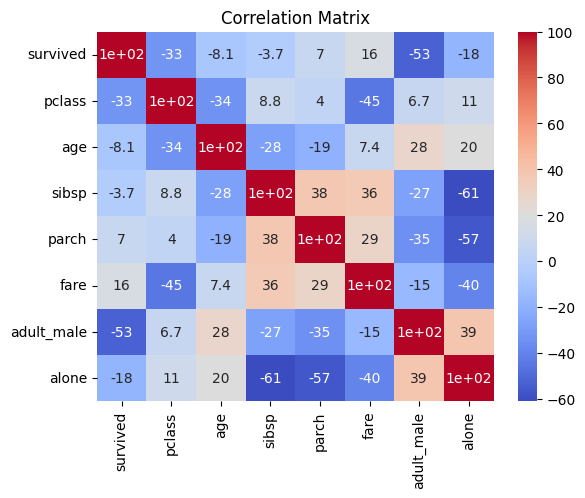

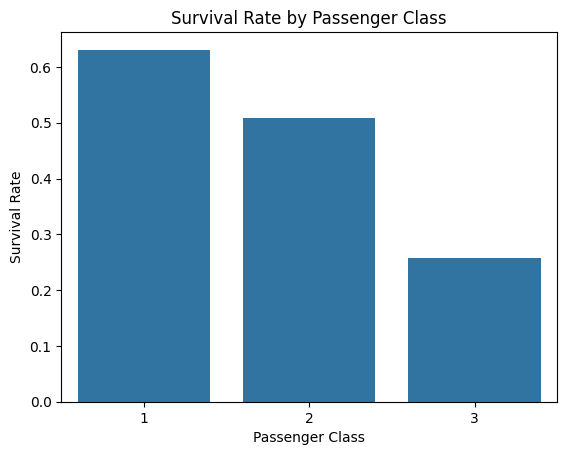

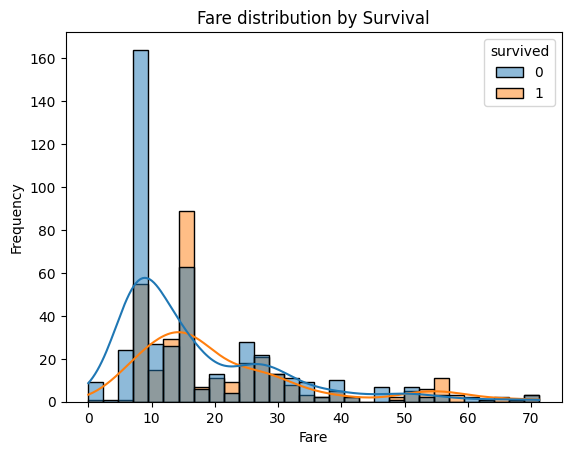

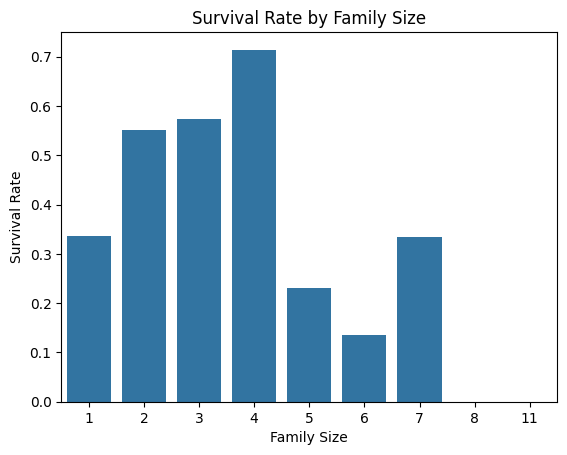

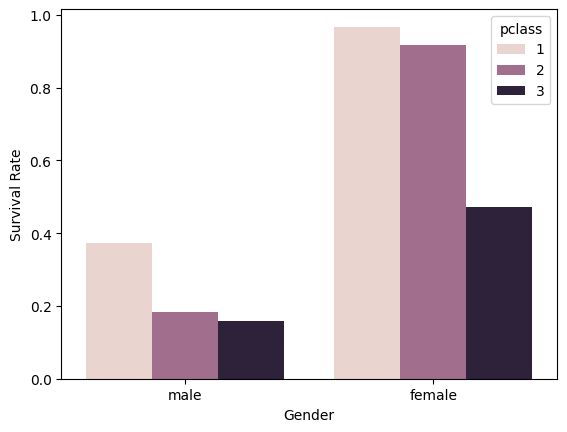

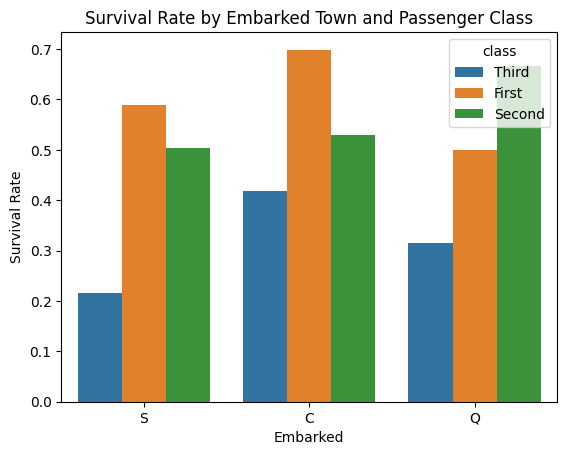

None


In [54]:
eda_function()